In [3]:
import os
from pathlib import Path
from dotenv import load_dotenv

load_dotenv()
os.chdir(os.getenv("PROJECT_ROOT"))

import numpy as np
from typing import Callable, Literal
import matplotlib.pyplot as plt


## load data

In [4]:
from patrec.utils.files_helper import JSON_Handler

# data = JSON_Handler('')
# data.data 

# Этапы:
# 5 датасетов - 1ч => 5ч (визуализация + базовые статистики + вайб-кодинг)
# все решения пайплана data+fe+clustering -> (2ч) dnn=PyPOTS (repr+clustering),  (2-3ч) ml=aeon+sktime (rocket+sats+catch22+tsfresh)  
# приложение (2-3ч) 
# в 18 - 20 - 24
# все остальное по плану до встречи с Ваней

In [12]:
from aeon.datasets import load_classification
from sklearn.preprocessing import LabelEncoder

# 1. загрузил данные и исправил неправильный формат y
# dataset_name =  'MelbournePedestrian'
dataset_name =  'Trace'
X, y, meta = load_classification(dataset_name, return_metadata=True)

le = LabelEncoder()
new_y = le.fit_transform(y)
y_mapping = {cls_lbl: le.transform(np.asarray([cls_lbl]))[0] for cls_lbl in le.classes_}
X.shape, new_y.shape, meta

((200, 1, 275),
 (200,),
 {'problemname': 'trace',
  'timestamps': False,
  'missing': False,
  'univariate': True,
  'equallength': True,
  'classlabel': True,
  'targetlabel': False,
  'class_values': ['1', '2', '3', '4']})

In [13]:
# для дальнейших возможных преобразований использую трансформеры из aeon как самые адекватные по своим свойствам

from aeon.visualisation import plot_series, plot_series_collection
from aeon.transformations.collection import (
    MinMaxScaler,
    Centerer, 
    Normalizer, 
    # полезная штука очень наглядная для небольших рядов
    AutocorrelationFunctionTransformer,
    # что-то есть
    ARCoefficientTransformer,
    # уменьшение длины ряда 
    DownsampleTransformer,
    # не понятно как считается и что дальше делать (просто fe)
    DWTTransformer,
    # (просто fe)
    HOG1DTransformer,
    # (просто fe), но и значения адеватно делят
    PeriodogramTransformer,
    MatrixProfile,
    # базовые fe функции
    SlopeTransformer,
    # для заполнения пропусков (таких нет)
    SimpleImputer
)

from aeon.utils.validation import has_missing, is_equal_length, is_univariate
from patrec.utils.preprocessing import EMA_Transformer, SMA_Transformer

def get_class_data(X_data, y_data, class_id, transform:Callable=None):
    """
    функция для фильтрации X и y по классу
    """
    if not isinstance(X_data, np.ndarray):
        X_data = np.asarray(X_data)
    if not isinstance(y_data, np.ndarray):
        y_data = np.asarray(y_data)
    
    classes = np.unique(y_data)
    true_inxs = (y_data == classes[class_id])
    
    if transform is not None:
        
        if not isinstance(transform, list):
            transform = [transform]
            
        new_X_data = X_data[true_inxs]
        
        for method in transform:
            prep_X_data = method.fit_transform(new_X_data)
            new_X_data = prep_X_data.copy()
                
        return new_X_data, y_data[true_inxs]
    
    return X_data[true_inxs], y_data[true_inxs]

## Analysis

In [7]:
AL_PATH = Path('.temp/Melbourne_Pedestrian/analysis')

### class1

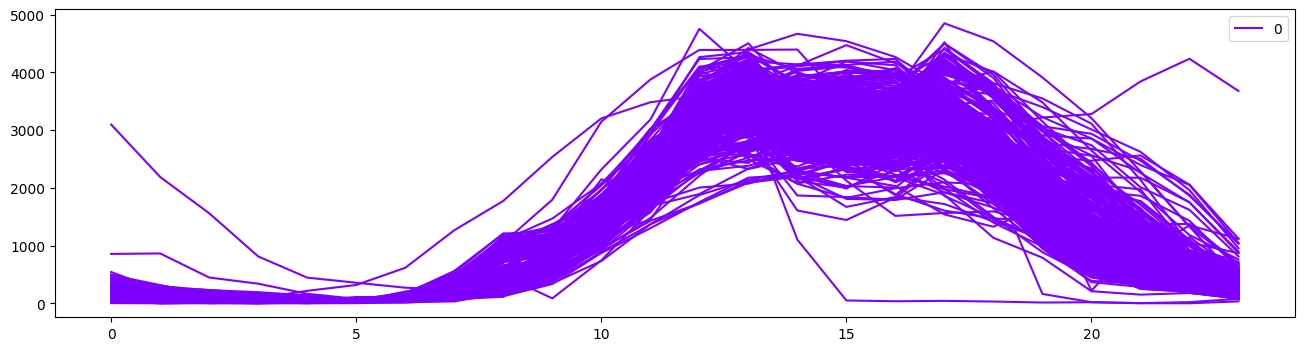

In [11]:
class_id = 0
X_class, y_class = get_class_data(X, new_y, class_id, None)
new_X_class, y_class = get_class_data(X, new_y, class_id, MinMaxScaler())

fig1, ax1 = plot_series_collection(X_class, y_class)
# fig2, ax2 = plot_series_collection(new_X_class, y_class)

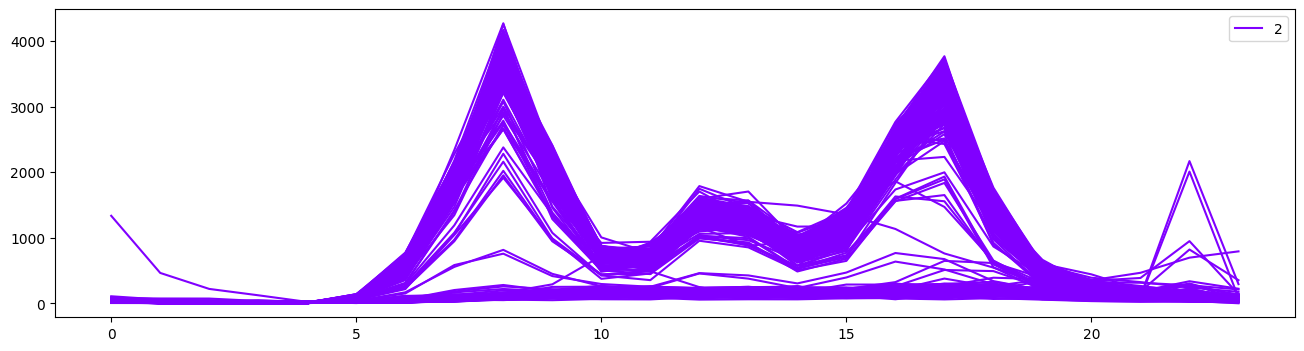

In [10]:
class_id = 2
X_class, y_class = get_class_data(X, new_y, class_id, None)
new_X_class, y_class = get_class_data(X, new_y, class_id, MinMaxScaler())

fig1, ax1 = plot_series_collection(X_class, y_class)
# fig2, ax2 = plot_series_collection(new_X_class, y_class)

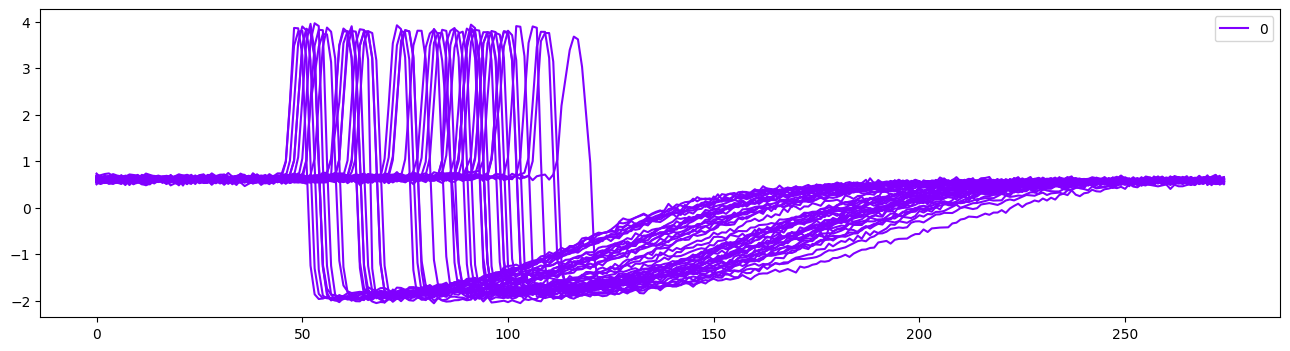

In [14]:
class_id = 0
X_class, y_class = get_class_data(X, new_y, class_id, None)
new_X_class, y_class = get_class_data(X, new_y, class_id, MinMaxScaler())

fig1, ax1 = plot_series_collection(X_class, y_class)
# fig2, ax2 = plot_series_collection(new_X_class, y_class)

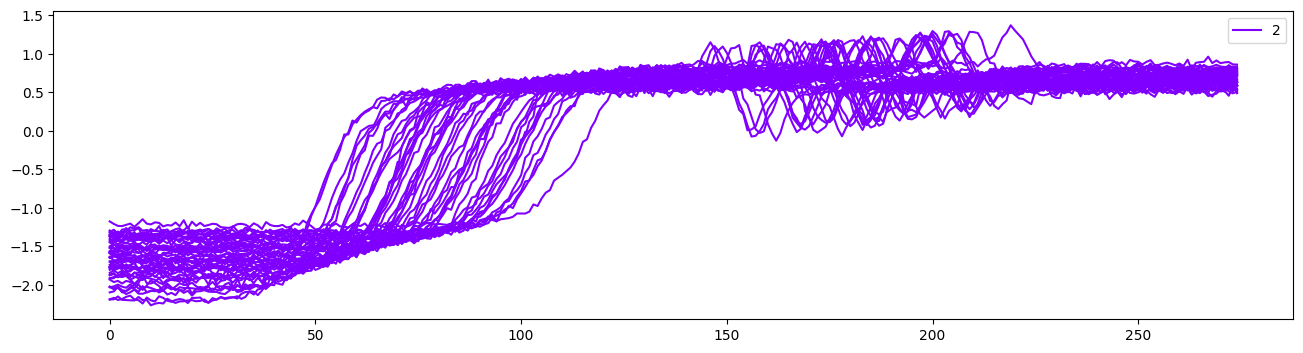

In [15]:
class_id = 2
X_class, y_class = get_class_data(X, new_y, class_id, None)
new_X_class, y_class = get_class_data(X, new_y, class_id, MinMaxScaler())

fig1, ax1 = plot_series_collection(X_class, y_class)
# fig2, ax2 = plot_series_collection(new_X_class, y_class)

In [ ]:
# # используем кластеризацию, чтобы начально оценить кластеры

# from sklearn.cluster import KMeans

# for num_cls in range(10, 1, -1):
#     print(num_cls)
    
#     model = KMeans(n_clusters=num_cls)
#     new_y_cl = model.fit_predict(X_class.squeeze(1))
#     fig1, ax1 = plot_series_collection(X_class, new_y_cl)
    
#     (AL_PATH / str(class_id) / f'pics/pseudo_clustering/{num_cls}').mkdir(parents=True, exist_ok=True) 
    
#     fig1.savefig(AL_PATH / str(class_id) / f'pics/pseudo_clustering/{num_cls}/all_cls.png')
#     plt.close()
    
#     for i in range(len(np.unique(new_y_cl))):
#         x1, y1 = get_class_data(X_class, new_y_cl, i, )
#         fig1, ax1 = plot_series_collection(x1, y1)
#         fig1.savefig(AL_PATH / str(class_id) / f'pics/pseudo_clustering/{num_cls}/cls_{i}.png')
#         plt.close()

In [ ]:
# from pathlib import Path

# savepath = Path('.temp/Melbourne_Pedestrian/original_data/')
# savepath.mkdir(exist_ok=True, parents=True)

# for class_id in range(np.unique(new_y).shape[0]):
    
#     print(class_id)
    
#     # X_class, y_class = get_class_data(X, new_y, class_id, None) 
#     # fig1, ax1 = plot_series_collection(X_class, y_class)
        
# #     pics_path = savepath/'pics/base/'
# #     pics_path.mkdir(exist_ok=True, parents=True)
    
# #     data_path = savepath/'data/sub/'
# #     data_path.mkdir(exist_ok=True, parents=True)
    
# #     fig1.savefig(pics_path / f'pic_{class_id}.png')
# #     plt.close()
# #     JSON_Handler(savepath / f'data/sub/X_feat_{class_id}.json', X_class)
# #     JSON_Handler(savepath / f'data/sub/y_{class_id}.json', y_class)

# # JSON_Handler(savepath/'data/X_features.json', X)
# # JSON_Handler(savepath/'data/labels.json', new_y)
# # JSON_Handler(savepath/'data/y_mapping.json', y_mapping)

#     # X_class, y_class = get_class_data(X, new_y, class_id, MinMaxScaler())
#     # fig1, ax1 = plot_series_collection(X_class, y_class)
    
#     # pics_path = savepath/'pics/norm/'
#     # pics_path.mkdir(exist_ok=True, parents=True)

#     # fig1.savefig(pics_path / f'pic_{class_id}.png')
#     # plt.close()
    
#     # data_path = savepath/'data/sub_norm/'
#     # data_path.mkdir(exist_ok=True, parents=True)
    
#     # JSON_Handler(savepath / f'data/sub_norm/X_feat_{class_id}.json', X_class)
#     # JSON_Handler(savepath / f'data/sub_norm/y_{class_id}.json', y_class)
    
#     # X_class, y_class = get_class_data(X, new_y, class_id, EMA_Transformer(alpha=0.8))
#     # X_class, y_class = get_class_data(X, new_y, class_id, SMA_Transformer(window_size=12))
    
#     fig1, ax1 = plot_series_collection(X_class, y_class)
    
#     pics_path = savepath/'pics/sma_12/'
#     pics_path.mkdir(exist_ok=True, parents=True)

#     fig1.savefig(pics_path / f'pic_{class_id}.png')
#     plt.close()
    
#     data_path = savepath/'data/sub_sma_12/'
#     data_path.mkdir(exist_ok=True, parents=True)
    
#     JSON_Handler(data_path / f'X_feat_{class_id}.json', X_class)
#     JSON_Handler(data_path / f'y_{class_id}.json', y_class)
    

#     # X_class, y_class = get_class_data(X,y,class_id,Centerer())
#     # fig3, _ = plot_series_collection(X_class, y_class)
#     # fig3.savefig(f'.temp/Melbourne_Pedestrian/original_sample/pic_{class_id}_cent.png')
#     # plt.close()
#     # X_class, y_class = get_class_data(X,y,class_id,Normalizer())
#     # fig3, _ = plot_series_collection(X_class, y_class)
#     # fig3.savefig(f'.temp/Melbourne_Pedestrian/original_sample/pic_{class_id}_norm_stand.png')
#     # plt.close()

In [ ]:
class_id = 3
X_class, y_class = get_class_data(X, new_y, class_id, None)
new_X_class, y_class = get_class_data(X, new_y, class_id, MinMaxScaler())

fig1, ax1 = plot_series_collection(X_class, y_class)
fig2, ax2 = plot_series_collection(new_X_class, y_class)

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from aeon.distances import dtw_distance
from typing import Union
from collections import defaultdict
import pandas as pd
from sklearn.metrics import root_mean_squared_error as rmse

# ---------- Вспомогательные функции ----------

def sort_by_rmse(x_data: np.ndarray, 
                 average_proto: np.ndarray, 
                 method: str = 'quantile', 
                 threshold: float = None,
                 quantile: float = 0.75,
                 n_groups: int = 2,
                 ignore_above: float = 1.0) -> Union[np.ndarray, list]:
    
    rmse_vals = np.array([rmse(average_proto, x) for x in x_data])
    
    if ignore_above < 1.0:
        upper_cutoff = np.quantile(rmse_vals, ignore_above)
        valid_mask = rmse_vals <= upper_cutoff
    else:
        valid_mask = np.ones_like(rmse_vals, dtype=bool)
    
    if method == 'threshold':
        if threshold is None:
            raise ValueError("Для метода 'threshold' необходимо указать параметр threshold")
        result_mask = (rmse_vals <= threshold) & valid_mask
        return result_mask
    
    elif method == 'quantile':
        if n_groups < 2:
            raise ValueError("Количество групп должно быть >= 2")
        
        valid_rmse = rmse_vals[valid_mask]
        quantiles = np.linspace(0, quantile, n_groups + 1)
        cutoffs = np.quantile(valid_rmse, quantiles[1:-1])
        
        masks = []
        lower = -np.inf
        
        for cutoff in cutoffs:
            group_mask = (rmse_vals > lower) & (rmse_vals <= cutoff) & valid_mask
            masks.append(group_mask)
            lower = cutoff
        
        group_mask = (rmse_vals > lower) & valid_mask
        masks.append(group_mask)
        
        if ignore_above < 1.0:
            invalid_mask = ~valid_mask
            for i in range(len(masks)):
                masks[i][invalid_mask] = False
        
        return masks[0] if n_groups == 2 else masks
    else:
        raise ValueError(f"Неизвестный метод фильтрации: {method}. Доступные методы: 'threshold', 'quantile'")

def get_cluster_prototypes(X, labels):
    prototypes = {}
    for label in np.unique(labels):
        indices = np.where(labels == label)[0]
        cluster_series = X[indices]
        prototypes[label] = np.mean(cluster_series, axis=0)
    return prototypes

def compute_prototype_migration_matrix(labels_k1, labels_k2, X, distance='rmse'):
    prototypes_k1 = get_cluster_prototypes(X, labels_k1)
    prototypes_k2 = get_cluster_prototypes(X, labels_k2)

    k1 = len(prototypes_k1)
    k2 = len(prototypes_k2)
    matrix = np.full((k1, k2), np.nan)

    for i in range(k1):
        for j in range(k2):
            idx_i = np.where(labels_k1 == i)[0]
            idx_j = np.where(labels_k2 == j)[0]
            common = np.intersect1d(idx_i, idx_j)

            if len(common) > 0:
                p1 = prototypes_k1[i]
                p2 = prototypes_k2[j]
                if distance == 'rmse':
                    d = rmse(p1, p2)
                elif distance == 'dtw':
                    d = dtw_distance(p1, p2)
                matrix[i, j] = d
    return matrix

# ---------- Основной алгоритм ----------

def analyze_migrations_and_quantiles(data: np.ndarray, 
                                     min_k: int = 2, 
                                     max_k: int = 10, 
                                     quantile: float = 0.95, 
                                     n_groups: int = 3):
    clusterings = {}
    prototypes_dict = {}
    result_dict = defaultdict(lambda: defaultdict(dict))
    migr_mtx = {}

    # Шаг 1: кластеризация для каждого k
    for k in range(max_k, min_k - 1, -1):
        model = KMeans(n_clusters=k, random_state=42)
        labels = model.fit_predict(data)
        clusterings[k] = labels
        prototypes_dict[k] = get_cluster_prototypes(data, labels)

    # Шаг 2: построение матриц миграций
    for k in range(max_k, min_k, -1):
        migr_mtx[k] = compute_prototype_migration_matrix(
            clusterings[k], clusterings[k-1], data, distance='dtw')

    # Шаг 3: квантильная сортировка для каждого кластера на каждом k
    for k in range(max_k, min_k - 1, -1):
        labels = clusterings[k]
        for label in np.unique(labels):
            indices = np.where(labels == label)[0]
            cluster_series = data[indices]
            proto = prototypes_dict[k][label]
            group_masks = sort_by_rmse(cluster_series, proto, quantile=quantile, n_groups=n_groups)
            result_dict[k][label]['full'] = indices
            for group_idx, mask in enumerate(group_masks):
                selected_indices = indices[mask]
                result_dict[k][label][group_idx] = selected_indices

    return result_dict, migr_mtx

# Генерация примера данных
# np.random.seed(42)
# n_samples = 50
# n_timestamps = 20
# data = np.random.rand(n_samples, n_timestamps)
# Запуск алгоритма

In [ ]:
data = new_X_class.squeeze(1).copy()
result_dict, migr_mtx = analyze_migrations_and_quantiles(data)

data.shape

In [ ]:
print(result_dict.keys(), result_dict[10].keys(), result_dict[10][0].keys(), result_dict[10][0][0].shape)

In [ ]:
pd.DataFrame(migr_mtx[3])

In [ ]:
pd.DataFrame(migr_mtx[4])

In [ ]:
dt = result_dict[4]
for k in dt.keys():
    # plot_series_collection(data[dt[k]['full']], [k]*len(dt[k]['full']))
    plot_series_collection(data[dt[k][0]], [k]*len(dt[k][0]))

In [ ]:
pd.DataFrame(migr_mtx[5])

In [ ]:
dt = result_dict[5]
for k in dt.keys():
    # plot_series_collection(data[dt[k]['full']], [k]*len(dt[k]['full']))
    plot_series_collection(data[dt[k][0]], [k]*len(dt[k][0]))

In [ ]:
pd.DataFrame(migr_mtx[6])

In [ ]:
dt = result_dict[6]
for k in dt.keys():
    plot_series_collection(data[dt[k]['full']], [k]*len(dt[k]['full']))
    # plot_series_collection(data[dt[k][0]], [k]*len(dt[k][0]))

In [ ]:
pd.DataFrame(migr_mtx[7])

In [ ]:
dt = result_dict[7]
for k in dt.keys():
    plot_series_collection(data[dt[k]['full']], [k]*len(dt[k]['full']))
    # plot_series_collection(data[dt[k][0]], [k]*len(dt[k][0]))

In [ ]:
result_dict

In [ ]:
from pathlib import Path
from typing import Dict, Any
from patrec.utils.files_helper import JSON_Handler

def save_result_dict_structure(result_dict: Dict[int, Dict[int, Dict[Any, Any]]], migr_mtx, base_path: Path, data=None) -> None:
    """
    Сохраняет структуру result_dict в папки по пути base_path/data/k/cluster/group.json

    Args:
        result_dict: Словарь вида result_dict[k][cluster][group] = np.ndarray
        base_path: Базовый путь для сохранения
    """
    data_root = base_path / 'data'
    data_root.mkdir(parents=True, exist_ok=True)

    for k, clusters in result_dict.items():

        for sample_prefix in result_dict[2][0].keys():
            res_path = data_root / str(k) / str(sample_prefix)
            json_data = {'data':None, 'labels':[], 'meta':[]}
        
            for inx, (pseudo_k, cluster) in enumerate(result_dict[k].items()):
                
                if json_data['data'] is None:
                    json_data['data'] = data[cluster[sample_prefix]] 
                else:
                    json_data['data'] = np.concatenate([json_data['data'], data[cluster[sample_prefix]]])
                
                json_data['labels'] += [inx] * len(data[cluster[sample_prefix]])
                json_data['meta'] += cluster[sample_prefix].tolist()

                pic_path = res_path / 'pics/'
                pic_path.mkdir(parents=True, exist_ok=True)

                # fig, _ = plot_series_collection(json_data['data'],json_data['labels'])
                # fig.savefig(pic_path / f'pic_tr_{inx}.png')
                # plt.close()

                fig, _ = plot_series_collection(data[cluster[sample_prefix]],[inx] * len(data[cluster[sample_prefix]]))
                plt.savefig(pic_path / f'pic_{inx}.png')
                plt.close()

            json_data['meta'] = np.asarray(json_data['meta']).reshape(-1, 1)
            
            JSON_Handler(filepath=res_path / f"cluster_al.json", data=json_data, mode='write')
            if migr_mtx.get(k) is not None:
                JSON_Handler(filepath=res_path / f"migr_mtx.json", data=migr_mtx[k], mode='write')
            

In [ ]:
fig, ax = plot_series_collection(new_X_class)
fig.savefig('.temp/Melbourne_Pedestrian/pseudo_data/2/data/10/0/pics/sp.png')

In [ ]:
from pathlib import Path

# Пример:
base_path = Path(f".temp/Melbourne_Pedestrian/pseudo_data/{class_id}")
save_result_dict_structure(result_dict, migr_mtx, base_path, new_X_class)

In [ ]:
# class_id = 3

for class_id in np.unique(new_y)[2:]:

    # X_class, y_class = get_class_data(X, new_y, class_id, None)
    new_X_class, y_class = get_class_data(X, new_y, class_id, MinMaxScaler())

    # fig1, ax1 = plot_series_collection(X_class, y_class)
    # fig2, ax2 = plot_series_collection(new_X_class, y_class)

    data = new_X_class.squeeze(1).copy()
    result_dict, migr_mtx = analyze_migrations_and_quantiles(data)

    base_path = Path(f".temp/Melbourne_Pedestrian/pseudo_data/{class_id}")
    save_result_dict_structure(result_dict, migr_mtx, base_path, new_X_class)

# SSL models

## my models 

# End

## марица миграции

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Функция для построения матрицы миграции между k1 -> k2 (k1 > k2)
def build_migration_matrix(labels_k1, labels_k2, k1, k2):
    """
    labels_k1: метки для большего k
    labels_k2: метки для меньшего k
    Возвращает матрицу m_ij: сколько объектов из кластера i (k1) попали в j (k2)
    """
    # Создаём матрицу размером k1 x k2
    migration_matrix = np.zeros((k1, k2))
    
    for i in range(len(labels_k1)):
        c1 = labels_k1[i]
        c2 = labels_k2[i]
        migration_matrix[c1, c2] += 1
    
    return migration_matrix

def stability_score(migration_matrix, method='diagonal'):
    """
    Методы:
    - 'diagonal': доля объектов, оставшихся в "том же" кластере (с учетом переименования)
    - 'max_overlap': максимальное перекрытие кластеров (по максимуму в строках)
    """
    if method == 'diagonal':
        # Диагональная стабильность (с учётом возможного переименования)
        total = migration_matrix.sum()
        # По строкам: максимум по столбцам — лучшее соответствие
        row_maxes = migration_matrix.max(axis=1)
        return row_maxes.sum() / total
    
    elif method == 'max_overlap':
        # Общая доля совпадений по максимуму
        max_sum = 0
        for i in range(migration_matrix.shape[0]):
            max_sum += migration_matrix[i].max()
        return max_sum / migration_matrix.sum()


# Генерация примерных данных: 8 временных рядов, длина 10
np.random.seed(42)
# data = np.array([
#     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # растущий тренд
#     [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],  # падающий тренд
#     [2, 3, 2, 3, 2, 3, 2, 3, 2, 3],   # колебания
#     [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],   # медленный рост
#     [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],   # постоянный
#     [1, 3, 5, 7, 9, 1, 3, 5, 7, 9],   # периодический
#     [8, 7, 6, 5, 4, 3, 2, 1, 0, 1],   # падение + скачок
#     [3, 3, 4, 4, 5, 5, 6, 6, 7, 7]    # умеренный рост
# ])
data = new_X_class[[0,1,2,3,4,5,6,7,8,9,21,22,28,25]].copy().squeeze(1)

df = pd.DataFrame(data, columns=[f'hour_{i}' for i in range(data.shape[1])])
print("Исходные временные ряды:")
print(df.head())

# Шаг 1: Нормализация (важно для временных рядов!)
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)
scaled_data = data.copy()

# Шаг 2: Задаём диапазон k
ks = [2, 3, 4]

# Храним метки для каждого k
labels_dict = {}

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=200)
    labels = kmeans.fit_predict(scaled_data)
    labels_dict[k] = labels

# Шаг 3: Строим матрицы миграции
migration_matrices = {}
for i in range(len(ks) - 1):
    k1 = ks[i]      # больший k
    k2 = ks[i+1]    # меньший k
    mat = build_migration_matrix(labels_dict[k1], labels_dict[k2], k1, k2)
    migration_matrices[f"{k1}->{k2}"] = mat

# Вывод матриц
for key, mat in migration_matrices.items():
    print(f"\nМатрица миграции {key}:")
    print(mat)
    
# Применяем к каждой матрице
print("\nСтабильность кластеризации:")
for key, mat in migration_matrices.items():
    score = stability_score(mat, method='diagonal')
    print(f"{key} → стабильность: {score:.3f}")

In [ ]:
plot_series_collection(data, labels_dict[2])
plot_series_collection(data, labels_dict[3])
plot_series_collection(data, labels_dict[4])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from dtaidistance import dtw

# Создаем пример временных рядов (5 рядов по 10 точек)
np.random.seed(42)
# data = np.array([
#     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # линейный рост
#     [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],  # линейное падение
#     [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5],  # медленный рост
#     [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],  # константа
#     [1, 4, 2, 5, 3, 6, 4, 7, 5, 8],  # колебания с ростом
#     [8, 5, 7, 4, 6, 3, 5, 2, 4, 1],  # колебания с падением
#     [2, 2, 3, 3, 4, 4, 5, 5, 6, 6],  # ступенчатый рост
#     [6, 6, 5, 5, 4, 4, 3, 3, 2, 2],  # ступенчатое падение
#     [3, 6, 4, 7, 5, 8, 6, 9, 7, 10], # более резкие колебания с ростом
#     [10, 7, 9, 6, 8, 5, 7, 4, 6, 3]  # более резкие колебания с падением
# ])

data = new_X_class[[0,1,2,3,4,5,6,7,8,9,21,22,28,25]].copy().squeeze(1)

# Функция для создания матрицы миграции
def create_migration_matrix(labels_k, labels_k_minus_1):
    k = len(np.unique(labels_k))
    k_minus_1 = len(np.unique(labels_k_minus_1))
    
    matrix = np.zeros((k, k_minus_1))
    
    for i in range(k):
        for j in range(k_minus_1):
            matrix[i, j] = np.sum((labels_k == i) & (labels_k_minus_1 == j))
    
    return matrix

# Кластеризация K-means с разным числом кластеров
kmeans4 = KMeans(n_clusters=4, random_state=42).fit(data)
kmeans3 = KMeans(n_clusters=3, random_state=42).fit(data)
kmeans2 = KMeans(n_clusters=2, random_state=42).fit(data)

# Получаем метки кластеров
labels4 = kmeans4.labels_
labels3 = kmeans3.labels_
labels2 = kmeans2.labels_

# Строим матрицы миграции
migration_4_to_3 = create_migration_matrix(labels4, labels3)
migration_3_to_2 = create_migration_matrix(labels3, labels2)

print("\nМатрица миграции 4→3 кластеров:")
print(migration_4_to_3)
print("Матрица миграции 5→4 кластеров:")
print(migration_3_to_2)

# Вычисляем DTW между строками матриц миграции
def calculate_dtw_distance(matrix):
    n = matrix.shape[0]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist_matrix[i, j] = dtw.distance(matrix[i], matrix[j])
    return dist_matrix

dtw_4_3 = calculate_dtw_distance(migration_4_to_3)
dtw_3_2 = calculate_dtw_distance(migration_3_to_2)

print("\nDTW расстояния между строками матрицы 4→3:")
print(dtw_4_3)
print("\nDTW расстояния между строками матрицы 3→2:")
print(dtw_3_2)

# Анализ устойчивости (чем меньше значения, тем устойчивее кластеризация)
stability_4_3 = np.mean(dtw_4_3)
stability_3_2 = np.mean(dtw_3_2)

print(f"Устойчивость перехода 4→3: {stability_4_3:.2f}")
print(f"\nУстойчивость перехода 3→2: {stability_3_2:.2f}")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from aeon.distances import dtw_distance
import matplotlib.pyplot as plt

# ====== Шаг 1: создаём временные ряды ======
np.random.seed(0)
# t = np.linspace(0, 10, 50)
# series = [
#     np.sin(t) + np.random.normal(0, 0.1, len(t)),
#     np.sin(t + 1) + np.random.normal(0, 0.1, len(t)),
#     np.sin(t + 2) + np.random.normal(0, 0.1, len(t)),
#     np.cos(t) + np.random.normal(0, 0.1, len(t)),
#     np.cos(t + 1) + np.random.normal(0, 0.1, len(t)),
#     np.cos(t + 2) + np.random.normal(0, 0.1, len(t)),
#     np.sin(2*t) + np.random.normal(0, 0.1, len(t)),
#     np.sin(2*t + 2) + np.random.normal(0, 0.1, len(t)),
#     np.zeros_like(t) + np.random.normal(0, 0.1, len(t)),
#     np.random.normal(0, 1, len(t))
# ]
# X = np.array(series)

# # Flatten for KMeans
# X_flat = X.reshape((X.shape[0], -1))
data = new_X_class[[0,1,2,3,4,5,6,7,8,9,21,22,28,25]].copy().squeeze(1)


# ====== Шаг 2: кластеризация при k = 5, 4, 3 ======
clusterings = {}
for k in [5, 4, 3, 2]:
    km = KMeans(n_clusters=k, random_state=0)
    labels = km.fit_predict(data)
    clusterings[k] = labels

# ====== Шаг 3: функция матрицы миграции с DTW из aeon ======
def compute_migration_matrix(labels_k1, labels_k2, X, distance='rmse'):
    k1 = len(set(labels_k1))
    k2 = len(set(labels_k2))
    matrix = np.zeros((k1, k2))

    for i in range(k1):
        idx_i = np.where(labels_k1 == i)[0]
        for j in range(k2):
            idx_j = np.where(labels_k2 == j)[0]
            common = np.intersect1d(idx_i, idx_j)
            if len(common) > 1:
                dist_sum = 0
                count = 0
                for m in range(len(common)):
                    for n in range(m + 1, len(common)):
                        x1 = X[common[m]]
                        x2 = X[common[n]]
                        if distance == 'rmse':
                            d = np.sqrt(mean_squared_error(x1, x2))
                        elif distance == 'dtw':
                            d = dtw_distance(x1, x2)
                        dist_sum += d
                        count += 1
                matrix[i, j] = dist_sum / count if count > 0 else 0
            else:
                matrix[i, j] = np.nan  # Недостаточно данных
    return matrix

# ====== Шаг 4: построение и вывод ======
def print_migration(matrix, from_k, to_k):
    print(f"\nМатрица миграции (метрика DTW): от k={from_k} к k={to_k}")
    df = pd.DataFrame(matrix, 
                      index=[f'Cluster_{i}_k{from_k}' for i in range(matrix.shape[0])],
                      columns=[f'Cluster_{j}_k{to_k}' for j in range(matrix.shape[1])])
    print(df.round(2))

migration_3_2 = compute_migration_matrix(clusterings[3], clusterings[2], X, distance='dtw')
migration_4_3 = compute_migration_matrix(clusterings[4], clusterings[3], X, distance='dtw')

print_migration(migration_3_2, 3, 2)
print_migration(migration_4_3, 4, 3)

migration_3_2 = compute_migration_matrix(clusterings[3], clusterings[2], X, distance='rmse')
migration_4_3 = compute_migration_matrix(clusterings[4], clusterings[3], X, distance='rmse')

print_migration(migration_3_2, 3, 2)
print_migration(migration_4_3, 4, 3)

plot_series_collection(data, clusterings[2])
plot_series_collection(data, clusterings[3])
plot_series_collection(data, clusterings[4])

In [ ]:
from collections import defaultdict
from aeon.distances import dtw_distance
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# ====== Новый метод: на основе прототипов кластеров ======
def get_cluster_prototypes(X, labels):
    """Возвращает словарь: {кластер: средний временной ряд (прототип)}"""
    prototypes = {}
    for label in np.unique(labels):
        indices = np.where(labels == label)[0]
        cluster_series = X[indices]
        prototypes[label] = np.mean(cluster_series, axis=0)
    return prototypes

def compute_prototype_migration_matrix(labels_k1, labels_k2, X, distance='rmse'):
    prototypes_k1 = get_cluster_prototypes(X, labels_k1)
    prototypes_k2 = get_cluster_prototypes(X, labels_k2)

    k1 = len(prototypes_k1)
    k2 = len(prototypes_k2)
    matrix = np.full((k1, k2), np.nan)

    for i in range(k1):
        for j in range(k2):
            # Найти общие наблюдения между кластером i при k1 и кластером j при k2
            idx_i = np.where(labels_k1 == i)[0]
            idx_j = np.where(labels_k2 == j)[0]
            common = np.intersect1d(idx_i, idx_j)

            if len(common) > 0:
                p1 = prototypes_k1[i]
                p2 = prototypes_k2[j]
                if distance == 'rmse':
                    d = np.sqrt(mean_squared_error(p1, p2))
                elif distance == 'dtw':
                    d = dtw_distance(p1, p2)
                matrix[i, j] = d
    return matrix

def print_prototype_migration(matrix, from_k, to_k, metric_name):
    print(f"\nМатрица миграции по прототипам ({metric_name.upper()}): от k={from_k} к k={to_k}")
    df = pd.DataFrame(matrix, 
                      index=[f'Cluster_{i}_k{from_k}' for i in range(matrix.shape[0])],
                      columns=[f'Cluster_{j}_k{to_k}' for j in range(matrix.shape[1])])
    print(df.round(2))

# ====== Расчет ======
migration_5_4_proto_dtw = compute_prototype_migration_matrix(clusterings[3], clusterings[2], data, distance='dtw')
migration_4_3_proto_dtw = compute_prototype_migration_matrix(clusterings[4], clusterings[3], data, distance='dtw')

print_prototype_migration(migration_4_3_proto_dtw, 4, 3, "dtw")
print_prototype_migration(migration_5_4_proto_dtw, 3, 2, "dtw")


plot_series_collection(data, clusterings[2])
plot_series_collection(data, clusterings[3])
plot_series_collection(data, clusterings[4])

In [ ]:
def find_optimal_k_by_prototype_destruction(clusterings, X, distance='dtw'):
    ks = sorted(clusterings.keys(), reverse=True)
    avg_dists = []

    for i in range(len(ks) - 1):
        k1, k2 = ks[i], ks[i+1]
        matrix = compute_prototype_migration_matrix(clusterings[k1], clusterings[k2], X, distance=distance)
        values = matrix[~np.isnan(matrix)]
        avg_dist = np.mean(values) if len(values) > 0 else np.nan
        avg_dists.append((k2, avg_dist))

    # Найдём "излом" — резкий рост среднего расстояния
    diffs = np.diff([d for _, d in avg_dists])
    if len(diffs) == 0:
        return ks[0]  # Недостаточно данных

    # Найдём максимальный скачок
    jump_idx = np.argmax(diffs)
    optimal_k = avg_dists[jump_idx][0]
    
    return optimal_k, avg_dists

find_optimal_k_by_prototype_destruction(clusterings, data)

## квантильная оценка

In [ ]:
from sklearn.metrics import root_mean_squared_error as rmse

def sort_by_rmse(x_data, average_proto):
    """Считает значения rmse"""
    
    rmse_vals = []
    
    for row_inx in range(x_data.shape[0]):
        rmse_vals.append(rmse(average_proto, x_data[row_inx].squeeze(0)))
    
    rmse_vals = np.asarray(rmse_vals)
    
    return rmse_vals <= rmse_vals.mean()

mask = sort_by_rmse(x1, avg_proto)

plot_series_collection(x1[mask])
plot_series_collection(x1[~mask])

In [ ]:
import numpy as np
from typing import Union

def sort_by_rmse(x_data: np.ndarray, 
                 average_proto: np.ndarray, 
                 method: str = 'quantile', 
                 threshold: float = None,
                 quantile: float = 0.75,
                 n_groups: int = 2,
                 ignore_above: float = 1.0) -> Union[np.ndarray, list]:
    """
    Фильтрация временных рядов на основе RMSE по различным методам.
    
    Параметры:
    ----------
    x_data : np.ndarray
        Входные данные временных рядов (n_samples, n_timesteps)
    average_proto : np.ndarray
        Референсный временной ряд для сравнения
    method : str, optional
        Метод фильтрации ('threshold' или 'quantile'), по умолчанию 'quantile'
    threshold : float, optional
        Пороговое значение RMSE для метода 'threshold'
    quantile : float, optional
        Граница квантиля для разделения (0-1), по умолчанию 0.75
    n_groups : int, optional
        Количество групп для разделения при методе 'quantile', по умолчанию 2
    ignore_above : float, optional
        Игнорировать значения выше этого квантиля (0-1), по умолчанию 1.0 (не игнорировать)
    
    Возвращает:
    -----------
    Union[np.ndarray, list]
        - Для n_groups=2: массив булевых значений
        - Для n_groups>2: список масок для каждой группы
    """
    
    # Вычисляем RMSE для каждого ряда
    rmse_vals = np.array([rmse(average_proto, x.squeeze(0)) for x in x_data])
    
    # Создаем маску для значений, которые не игнорируем
    if ignore_above < 1.0:
        upper_cutoff = np.quantile(rmse_vals, ignore_above)
        valid_mask = rmse_vals <= upper_cutoff
    else:
        valid_mask = np.ones_like(rmse_vals, dtype=bool)
    
    if method == 'threshold':
        if threshold is None:
            raise ValueError("Для метода 'threshold' необходимо указать параметр threshold")
        
        result_mask = (rmse_vals <= threshold) & valid_mask
        return result_mask
    
    elif method == 'quantile':
        if n_groups < 2:
            raise ValueError("Количество групп должно быть >= 2")
        
        # Вычисляем границы квантилей только для валидных значений
        valid_rmse = rmse_vals[valid_mask]
        quantiles = np.linspace(0, quantile, n_groups + 1)
        cutoffs = np.quantile(valid_rmse, quantiles[1:-1])
        
        # Создаем маски для каждой группы
        masks = []
        lower = -np.inf
        
        for cutoff in cutoffs:
            group_mask = (rmse_vals > lower) & (rmse_vals <= cutoff) & valid_mask
            masks.append(group_mask)
            lower = cutoff
        
        # Последняя группа (выше последнего cutoff)
        group_mask = (rmse_vals > lower) & valid_mask
        masks.append(group_mask)
        
        # Все значения выше ignore_above будут False во всех группах
        if ignore_above < 1.0:
            invalid_mask = ~valid_mask
            for i in range(len(masks)):
                masks[i][invalid_mask] = False
        
        return masks[0] if n_groups == 2 else masks
    
    else:
        raise ValueError(f"Неизвестный метод фильтрации: {method}. Доступные методы: 'threshold', 'quantile'")
    
    
mask = sort_by_rmse(x1, avg_proto, method='quantile', quantile=0.75)

plot_series_collection(x1[mask])
plot_series_collection(x1[~mask])


In [ ]:
masks = sort_by_rmse(x1, avg_proto, method='quantile', quantile=0.8, n_groups=4, ignore_above=0.95)

for i, mask in enumerate(masks):
    print(mask.shape, np.asarray(mask).sum())
    plot_series_collection(x1[mask])

## Prepare data

In [ ]:
from patrec.generation.ts_generators import sin_wave, sin_wave_norm

In [ ]:
y_synth = np.asarray([np.random.randint(2,4) for _ in range(100)])
X_synth = np.asarray([sin_wave_norm(20, y_synth[inx], 0, 200) if y_synth[inx] == 3 else sin_wave_norm(34, y_synth[inx], 0, 200) for inx in range(100)])

plot_series_collection(X_synth, y_synth)
new_X_synth, new_y_synth = get_class_data(X_synth, y_synth, 0, AutocorrelationFunctionTransformer(10))

new_X_synth.shape, new_y_synth.shape

In [ ]:
plot_series_collection(new_X_synth[:2])

In [ ]:
new_X, new_y = get_class_data(X, y, 4, SlopeTransformer(4))
new_X1, _ = get_class_data(X, y, 4, None)
plot_series_collection(new_X[:16]) # [:16]
plot_series_collection(new_X1[:16])

In [ ]:
plot_series_collection(new_X1[:3])
plot_series_collection(new_X[:3])
new_X[:3]

In [ ]:
from aeon.transformations.collection.shapelet_based import SAST
x1, y1 = get_class_data(X, y, 4, None)
sast = SAST(np.arange(3, int(x1.shape[2]/2)), # [3,4,6,12]
    stride=1)
sast.fit(x1, y1)
X_train_transform = sast.transform(x1)

In [ ]:
x1.shape, np.arange(3, X.shape[2]), X_train_transform.shape

In [ ]:
plot_series_collection(X_train_transform[:16,:])
plot_series_collection(x1[:16,:])

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)

lbls = model.fit_predict(X_train_transform)
lbls

In [ ]:
plot_series_collection(x1, lbls)

In [ ]:
plot_series_collection(X_train_transform, lbls)

In [ ]:
from aeon.classification.shapelet_based import SASTClassifier

clf = SASTClassifier(np.arange(3, int(x1.shape[2]/2)), nb_inst_per_class=1, seed=25)
clf

In [ ]:
clf.fit(x1, lbls)

In [ ]:
clf._classifier.coef_.shape

In [ ]:
for inx0 in range(len(np.unique(lbls))):
    print('#'*50)
    print(inx0)
    print('#'*50)
    for inx1 in range(clf._classifier.coef_.shape[0]):
        print('*'*50)
        print(inx1)
        print('*'*50)
        print(1)
        fig = clf.plot_most_important_feature_on_ts(
            x1[lbls == inx0][0, 0, :], clf._classifier.coef_[inx1,:]
        )
        plt.show()
        print(2)
        fig = clf.plot_most_important_feature_on_ts(
            x1[lbls == inx0][-1, 0, :], clf._classifier.coef_[inx1,:]
        )
        plt.show()

### sktime


In [ ]:
from sktime.datasets import load_airline
from sktime.transformations.series.detrend import STLTransformer
X_1 = load_airline()  
transformer = STLTransformer(sp=12)  
X_t = transformer.fit_transform(X_1)

plot_series(X_1)  
plot_series(X_t)
transformer = STLTransformer(sp=24)  
X_t = transformer.fit_transform(X_1)

plot_series(X_t)

In [ ]:
from sktime.transformations.series.detrend import Deseasonalizer
from sktime.datasets import load_airline
y_1 = load_airline()  
transformer = Deseasonalizer(sp=24)  
y_t = transformer.fit_transform(y_1)

plot_series(y_1)
plot_series(y_t)
  

In [ ]:
from pyts.preprocessing import PowerTransformer, QuantileTransformer

x1, y1 = get_class_data(X, y, 4, None)

X_power = PowerTransformer().transform(x1.squeeze(1))
X_quantile = QuantileTransformer(n_quantiles=4).transform(x1.squeeze(1))

plot_series_collection(x1)
plot_series_collection(X_power)
plot_series_collection(X_quantile)

## что-то другое